# KNN Classifier for Multinomail Classification

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### Reading the dataset

In [2]:
dataset = pd.read_csv('C:/Users/hassa/OneDrive/Desktop/VI sem/ML/lab-external/dataset/Logistic_Iris.csv')

### Defining features as x

In [3]:
x = dataset.iloc[:,[0,1,2,3]].values

### Defining target variable y

In [4]:
y = dataset.iloc[:,4].values

### Splitting the dataset

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

### Standardizing the values

In [6]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

### Defining the KNN Classifier

In [8]:
knn = KNeighborsClassifier(n_neighbors = 7)

### Fitting the training data

In [9]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

### Predicted values

In [10]:
ypred = knn.predict(xtest)
ypred

C:\Users\hassa\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

### Score of the classifier

In [11]:
knn.score(xtest,ytest)

C:\Users\hassa\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9736842105263158

### Accuracy Score

In [13]:
acc_knn = accuracy_score(ytest, ypred)*100
acc_knn

97.36842105263158

### Confusion Matrix

In [14]:
cm = confusion_matrix(ytest, ypred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

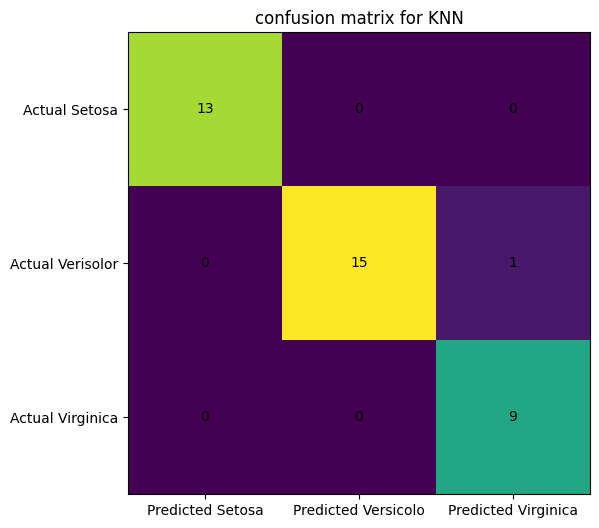

In [16]:
fig, ax = plt.subplots(figsize = (6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1,2), ticklabels = ('Predicted Setosa', 'Predicted Versicolo','Predicted Virginica'))
ax.yaxis.set(ticks = (0,1,2), ticklabels=('Actual Setosa','Actual Verisolor','Actual Virginica'))
ax.set_ylim(2.5,-0.5)
plt.title('confusion matrix for KNN')
for i in range(3):
    for j in range(3):
        ax.text(j,i,cm[i,j], ha='center',va='center',color='black')
plt.show()

C:\Users\hassa\AppData\Local\Temp\ipykernel_6808\3340327696.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xset[yset == j,2], xset[yset == j,3], c = ListedColormap(('red','green','blue'))(i),label = j)


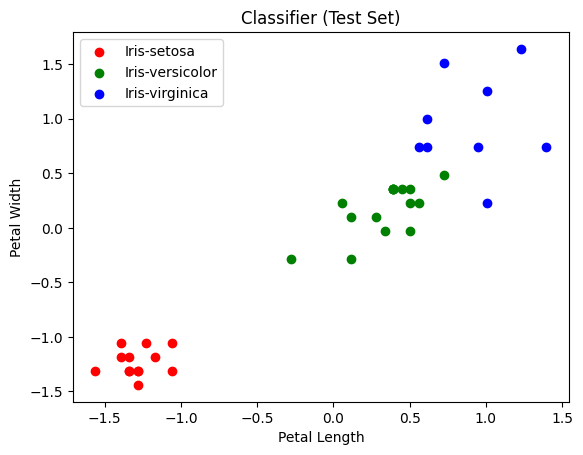

In [18]:
xset, yset = xtest, ytest
for i, j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset == j,2], xset[yset == j,3], c = ListedColormap(('red','green','blue'))(i),label = j)
plt.title('Classifier (Test Set)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

C:\Users\hassa\AppData\Local\Temp\ipykernel_6808\158659028.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xset[yset == j,0], xset[yset == j,1], c = ListedColormap(('red','green','blue'))(i),label = j)


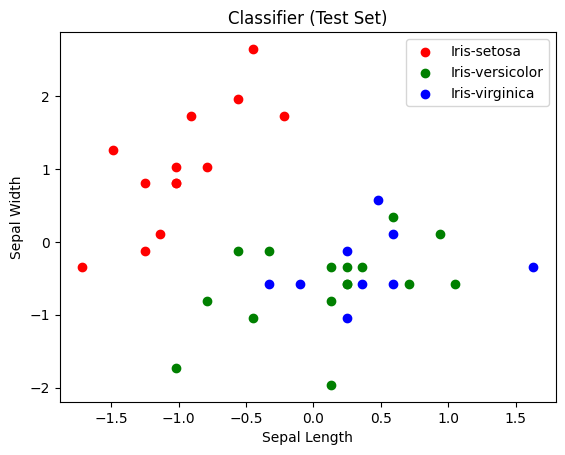

In [25]:
xset, yset = xtest, ytest
for i, j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset == j,0], xset[yset == j,1], c = ListedColormap(('red','green','blue'))(i),label = j)
plt.title('Classifier (Test Set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [22]:
neighbors = np.arange(1,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


C:\Users\hassa\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hassa\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

<function matplotlib.pyplot.show(close=None, block=None)>

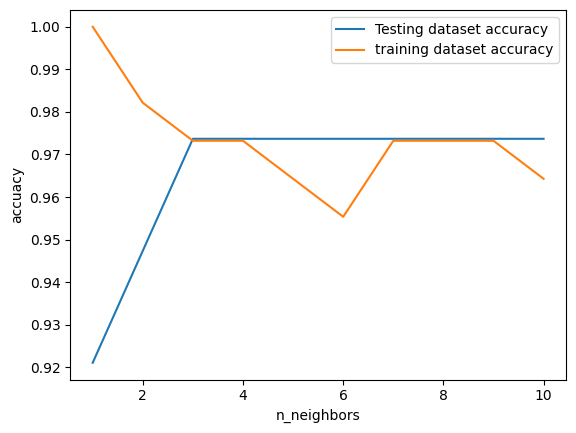

In [24]:
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain, ytrain)
    train_accuracy[i] = knn.score(xtrain, ytrain)
    test_accuracy[i] = knn.score(xtest, ytest)

# generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset accuracy')
plt.plot(neighbors, train_accuracy, label = 'training dataset accuracy')
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel('accuacy')
plt.show    

### -------------------------------------------------------------